In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('sunny_cluster.csv')
df.head()

,GHI,Clearsky DHI,cluster,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
0,427,50,0,60,894,4.7,54.23,3.0,959,444,0,65.75
1,394,48,0,48,933,4.3,55.89,2.3,938,396,0,68.20
2,370,48,0,54,882,2.9,50.80,-0.9,947,387,0,69.01
3,438,53,0,55,956,2.9,48.99,-0.4,969,442,0,66.36
4,484,60,0,60,980,2.9,47.64,0.1,980,484,0,64.37


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop(["cluster"],axis=1,inplace=True)

In [5]:
df.head()

,GHI,Clearsky DHI,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
0,427,50,60,894,4.7,54.23,3.0,959,444,0,65.75
1,394,48,48,933,4.3,55.89,2.3,938,396,0,68.20
2,370,48,54,882,2.9,50.80,-0.9,947,387,0,69.01
3,438,53,55,956,2.9,48.99,-0.4,969,442,0,66.36
4,484,60,60,980,2.9,47.64,0.1,980,484,0,64.37


In [6]:
df.describe()

,GHI,Clearsky DHI,DHI,DNI,Wind Speed,Relative Humidity,Temperature,Clearsky DNI,Clearsky GHI,Cloud Type,Solar Zenith Angle
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,616.202456,91.901331,156.200614,726.331832,2.717994,27.690878,16.832487,919.222723,693.633982,1.891709,47.676669
std,192.619786,40.769207,110.079159,284.966113,1.321444,13.683449,10.539028,102.613445,198.179709,2.796603,14.640440
min,310.000000,37.000000,37.000000,23.000000,0.200000,5.980000,-12.600000,286.000000,321.000000,0.000000,16.250000
25%,455.000000,68.000000,74.000000,522.000000,1.800000,16.590000,8.300000,879.000000,522.000000,0.000000,36.120000
50%,588.000000,84.000000,105.000000,837.000000,2.600000,25.570000,18.400000,945.000000,688.000000,0.000000,49.730000
75%,763.000000,102.000000,221.000000,960.000000,3.400000,36.500000,26.000000,987.000000,864.000000,4.000000,60.360000
max,1060.000000,377.000000,512.000000,1092.000000,8.700000,77.970000,34.100000,1092.000000,1065.000000,9.000000,72.260000


In [7]:
s1= MinMaxScaler(feature_range=(-1,1))
Xs= s1.fit_transform(df)

In [8]:

s2=MinMaxScaler(feature_range=(-1,1))
Ys= s2.fit_transform(df[['GHI']])

In [9]:
Xs.shape

(4885, 11)

In [10]:
#Xs.reshape(1,662,6)

In [11]:
Ys.shape

(4885, 1)

In [12]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

In [13]:
X,Y = np.array(X), np.array(Y)

In [14]:
X_train1, y_train1 = X[:3909], Y[:3909]
#X_val1, y_val1 = X[3530:3971], Y[3530:3971]
X_test1, y_test1 = X[3909:], Y[3909:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape


((3909, 5, 11), (3909, 1), (971, 5, 11), (971, 1))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf 
model= Sequential()
#model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],X.shape[2])))  
#model.add(Dropout (0.2))
#model.add(LSTM(units=50,return_sequences=True))

#model.add(Dropout (0.2))
#model.add(LSTM(units=50))
#model.add(Dropout (0.2))
#model.add(Dense(units=1))
#model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

# Adding the first LSTM layer and some Dropout regularisation
model.add(Bidirectional(LSTM(units = 120, activation='relu', return_sequences=True,input_shape=(X_train1.shape[1], X_train1.shape[2]))))
model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(units = 96, activation='relu',return_sequences=True )))
#model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units = 48, activation='relu')))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 10))    
model.add(Dense(units = 1))     

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [16]:
#from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=50)
import time 
start= time.time()
history=model.fit(X_train1,y_train1,epochs=100)
end= time.time()
continental= end-start

Epoch 1/100
123/123 [==============================] - 8s 17ms/step - loss: 0.0837 - root_mean_squared_error: 0.2893
Epoch 2/100
123/123 [==============================] - 2s 15ms/step - loss: 0.0528 - root_mean_squared_error: 0.2298
Epoch 3/100
123/123 [==============================] - 2s 17ms/step - loss: 0.0506 - root_mean_squared_error: 0.2250
Epoch 4/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0491 - root_mean_squared_error: 0.2216
Epoch 5/100
123/123 [==============================] - 2s 16ms/step - loss: 0.0470 - root_mean_squared_error: 0.2168
Epoch 6/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0437 - root_mean_squared_error: 0.2092
Epoch 7/100
123/123 [==============================] - 2s 18ms/step - loss: 0.0434 - root_mean_squared_error: 0.2084
Epoch 8/100
123/123 [==============================] - 2s 17ms/step - loss: 0.0431 - root_mean_squared_error: 0.2077
Epoch 9/100
123/123 [==============================] - 2s 18ms/s

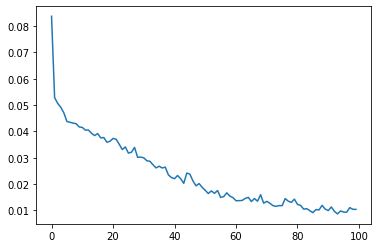

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
import time
start=time.time()
Yp= model.predict(X_test1)
end=time.time()
continental=end-start
print("inference time:",continental)
print(Yp)

31/31 [==============================] - 1s 5ms/step
inference time: 0.9832847118377686
[[-0.1107464 ]
 [-0.4387976 ]
 [-0.7448411 ]
 [-0.828897  ]
 [-0.8101092 ]
 [-0.5454677 ]
 [-0.3107578 ]
 [-0.41626418]
 [-0.255696  ]
 [-0.50681037]
 [-0.37601653]
 [-0.08178848]
 [ 0.0279155 ]
 [ 0.07194101]
 [-0.01021729]
 [ 0.06172768]
 [-0.12916072]
 [-0.38353837]
 [-0.71024394]
 [-0.7253438 ]
 [-0.834111  ]
 [-0.6349814 ]
 [-0.43353078]
 [-0.618091  ]
 [-0.5832784 ]
 [-0.36619934]
 [-0.1032735 ]
 [-0.26592833]
 [-0.7561216 ]
 [-0.73225576]
 [-0.7618572 ]
 [-0.71337795]
 [-0.7908309 ]
 [-0.6905991 ]
 [-0.6307521 ]
 [-0.5587565 ]
 [-0.8974069 ]
 [-0.6221792 ]
 [-0.8575525 ]
 [-0.68749803]
 [-0.47653484]
 [-0.12040769]
 [ 0.06506837]
 [ 0.2290383 ]
 [ 0.35167637]
 [ 0.38945538]
 [ 0.36960623]
 [ 0.3174457 ]
 [ 0.23638147]
 [ 0.11361767]
 [-0.02753922]
 [-0.19397676]
 [-0.42014664]
 [-0.73283625]
 [-0.8379673 ]
 [-0.60610414]
 [-0.33165744]
 [-0.14613357]
 [ 0.03772296]
 [ 0.16176501]
 [ 0.2754798

In [19]:
Yp.shape

(971, 1)

In [20]:
pred= s2.inverse_transform(Yp)

In [21]:
Actual= s2.inverse_transform(y_test1)

In [22]:
x= pred
z= Actual

In [23]:
from sklearn.metrics import mean_squared_error
import math

 
MSE = mean_squared_error(z,x)
 
RMSE = math.sqrt(MSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(z,x)
print("Root Mean Square Error:",RMSE)
print("Mean Square Error:", MSE)
print("Mean Absolute Error:",MAE)


Root Mean Square Error: 40.29109425281401
Mean Square Error: 1623.3722760891426
Mean Absolute Error: 27.858363079852843


In [24]:
max= x.max()
min= x.min()
mean= x.mean()
max,min,mean

(831.0458, 333.12808, 513.4913)

In [25]:
NRMSE= (RMSE/(max-min))*100
NRMSE

8.091918550174256

In [26]:
Calculated =pd.DataFrame(x, columns = ['Prediction'])
Actual = pd.DataFrame(z, columns = ['Actual'])


In [27]:
Calculated.to_csv(r"E:\CatBoost_1\Golden\LSTM\sunny_hours\prediction.csv")

In [28]:
Actual.to_csv(r"E:\CatBoost_1\Golden\LSTM\sunny_hours\Actual.csv")